# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [104]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import os
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [105]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


In [106]:
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&q={city}&appid={weather_api_key}"

In [107]:
response = requests.get(url).json()

In [108]:
response = json.dumps(response, indent=4)

In [109]:
print(response)

{
    "coord": {
        "lon": -76.2167,
        "lat": -13.7
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 23.03,
        "feels_like": 23.06,
        "temp_min": 21.12,
        "temp_max": 23.03,
        "pressure": 1011,
        "humidity": 64
    },
    "visibility": 10000,
    "wind": {
        "speed": 7.72,
        "deg": 210
    },
    "clouds": {
        "all": 0
    },
    "dt": 1684709226,
    "sys": {
        "type": 1,
        "id": 8691,
        "country": "PE",
        "sunrise": 1684667909,
        "sunset": 1684709082
    },
    "timezone": -18000,
    "id": 3932145,
    "name": "Pisco",
    "cod": 200
}


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [113]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"&q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | talnakh
Processing Record 2 of Set 1 | tvoroyri
Processing Record 3 of Set 1 | buka
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | anadyr
Processing Record 9 of Set 1 | lihue
Processing Record 10 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 11 of Set 1 | happy valley-goose bay
Processing Record 12 of Set 1 | alofi
Processing Record 13 of Set 1 | whitehorse
Processing Record 14 of Set 1 | uturoa
Processing Record 15 of Set 1 | stanley
Processing Record 16 of Set 1 | tommot
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | kingscliff
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | pustoshka
Processing Record 21 of Set 1 | susuman
Processing Record 22

Processing Record 39 of Set 4 | port lincoln
Processing Record 40 of Set 4 | luderitz
Processing Record 41 of Set 4 | codrington
Processing Record 42 of Set 4 | torghay
Processing Record 43 of Set 4 | palmer
Processing Record 44 of Set 4 | petropavlovsk-kamchatsky
Processing Record 45 of Set 4 | bethanie
Processing Record 46 of Set 4 | mountain home
Processing Record 47 of Set 4 | olonkinbyen
Processing Record 48 of Set 4 | carnarvon
Processing Record 49 of Set 4 | nemuro
Processing Record 0 of Set 5 | longyearbyen
Processing Record 1 of Set 5 | palikir - national government center
Processing Record 2 of Set 5 | saipan
Processing Record 3 of Set 5 | kavalerovo
Processing Record 4 of Set 5 | pandan
Processing Record 5 of Set 5 | hauterive
Processing Record 6 of Set 5 | port saint john's
Processing Record 7 of Set 5 | fort bragg
Processing Record 8 of Set 5 | al bab
Processing Record 9 of Set 5 | shingu
Processing Record 10 of Set 5 | mejit
Processing Record 11 of Set 5 | severo-yeniseys

Processing Record 28 of Set 8 | san-pedro
Processing Record 29 of Set 8 | caconda
Processing Record 30 of Set 8 | bani walid
Processing Record 31 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 32 of Set 8 | santiago de chuco
Processing Record 33 of Set 8 | upata
Processing Record 34 of Set 8 | praia
Processing Record 35 of Set 8 | ostrow mazowiecka
Processing Record 36 of Set 8 | grand-bassam
Processing Record 37 of Set 8 | exu
Processing Record 38 of Set 8 | whangarei
Processing Record 39 of Set 8 | kirkland lake
Processing Record 40 of Set 8 | harper
Processing Record 41 of Set 8 | ta`u
Processing Record 42 of Set 8 | nadvoitsy
Processing Record 43 of Set 8 | lerwick
Processing Record 44 of Set 8 | nawabganj
Processing Record 45 of Set 8 | santa fe
Processing Record 46 of Set 8 | greymouth
Processing Record 47 of Set 8 | sulecin
Processing Record 48 of Set 8 | xuanzhou
Processing Record 49 of Set 8 | mossel bay
Processing Record 0 of Set 9 | sidi ifni
Proce

Processing Record 19 of Set 12 | geraldton
Processing Record 20 of Set 12 | tete
Processing Record 21 of Set 12 | yung shue wan
Processing Record 22 of Set 12 | nikolayevsk-on-amure
Processing Record 23 of Set 12 | pimentel
Processing Record 24 of Set 12 | brookings
Processing Record 25 of Set 12 | puente alto
Processing Record 26 of Set 12 | ranot
Processing Record 27 of Set 12 | kiunga
Processing Record 28 of Set 12 | nouadhibou
Processing Record 29 of Set 12 | naifaru
Processing Record 30 of Set 12 | saint helier
Processing Record 31 of Set 12 | guiratinga
Processing Record 32 of Set 12 | sychevka
Processing Record 33 of Set 12 | vohipaho
City not found. Skipping...
Processing Record 34 of Set 12 | novaya lyalya
Processing Record 35 of Set 12 | nova mayachka
Processing Record 36 of Set 12 | redcliff
Processing Record 37 of Set 12 | woolgoolga
Processing Record 38 of Set 12 | thunder bay
Processing Record 39 of Set 12 | pancas
Processing Record 40 of Set 12 | nanao
Processing Record 

In [114]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [119]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,0.67,99,100,2.73,RU,1684710139
1,tvoroyri,61.5556,-6.8111,8.64,86,71,10.30,FO,1684710139
2,buka,40.8108,69.1986,19.96,31,1,1.92,UZ,1684710140
3,edinburgh of the seven seas,-37.0676,-12.3116,15.81,85,82,8.75,SH,1684710140
4,waitangi,-43.9535,-176.5597,13.23,75,60,5.36,NZ,1684710140


In [120]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [121]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,0.67,99,100,2.73,RU,1684710139
1,tvoroyri,61.5556,-6.8111,8.64,86,71,10.30,FO,1684710139
2,buka,40.8108,69.1986,19.96,31,1,1.92,UZ,1684710140
3,edinburgh of the seven seas,-37.0676,-12.3116,15.81,85,82,8.75,SH,1684710140
4,waitangi,-43.9535,-176.5597,13.23,75,60,5.36,NZ,1684710140


In [125]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 578
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        579 non-null    object 
 1   Lat         579 non-null    float64
 2   Lng         579 non-null    float64
 3   Max Temp    579 non-null    float64
 4   Humidity    579 non-null    int64  
 5   Cloudiness  579 non-null    int64  
 6   Wind Speed  579 non-null    float64
 7   Country     575 non-null    object 
 8   Date        579 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 61.4+ KB


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

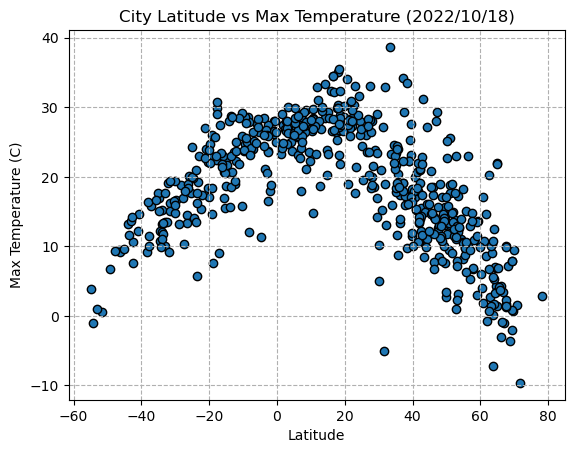

In [127]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs Max Temperature (2022/10/18)')
plt.grid(linestyle='--')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

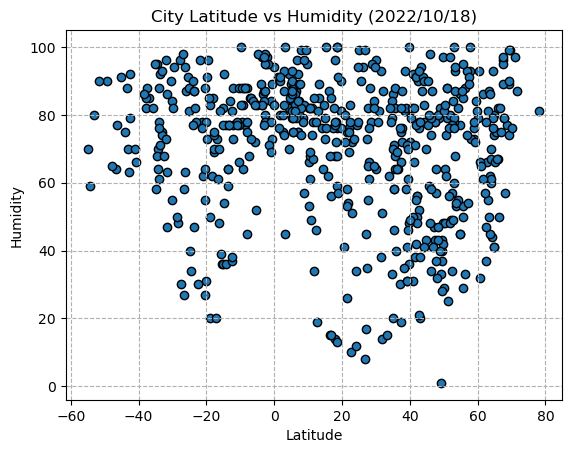

In [128]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity (2022/10/18)')
plt.grid(linestyle='--')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

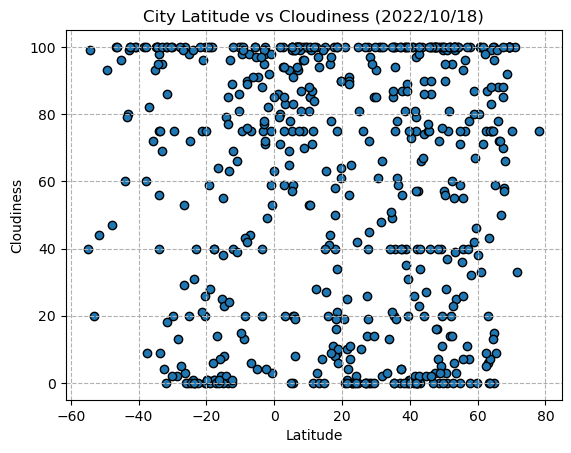

In [129]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudiness (2022/10/18)')
plt.grid(linestyle='--')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

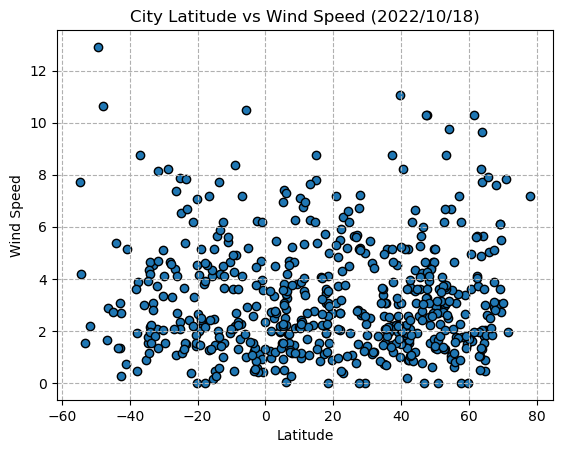

In [130]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs Wind Speed (2022/10/18)')
plt.grid(linestyle='--')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [131]:
# Define a function to create Linear Regression plots
def lin_reg(x,y):
    slope, intercept, r_val, p_val, std_err = linregress(x, y)
    return slope, intercept, r_val, p_val, std_err

In [132]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
city_data_df['Lat'] = pd.to_numeric(city_data_df['Lat'], errors='coerce')
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,0.67,99,100,2.73,RU,1684710139
1,tvoroyri,61.5556,-6.8111,8.64,86,71,10.30,FO,1684710139
2,buka,40.8108,69.1986,19.96,31,1,1.92,UZ,1684710140
6,albany,42.6001,-73.9662,22.02,52,23,2.09,US,1684710141
7,anadyr,64.7500,177.4833,4.28,80,100,3.00,RU,1684710059


In [133]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,edinburgh of the seven seas,-37.0676,-12.3116,15.81,85,82,8.75,SH,1684710140
4,waitangi,-43.9535,-176.5597,13.23,75,60,5.36,NZ,1684710140
5,port-aux-francais,-49.3500,70.2167,6.70,90,93,12.91,TF,1684710140
10,alofi,-19.0595,-169.9187,25.94,83,100,5.14,NU,1684710142
12,uturoa,-16.7333,-151.4333,27.40,73,14,1.26,PF,1684710142


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8057761510447103


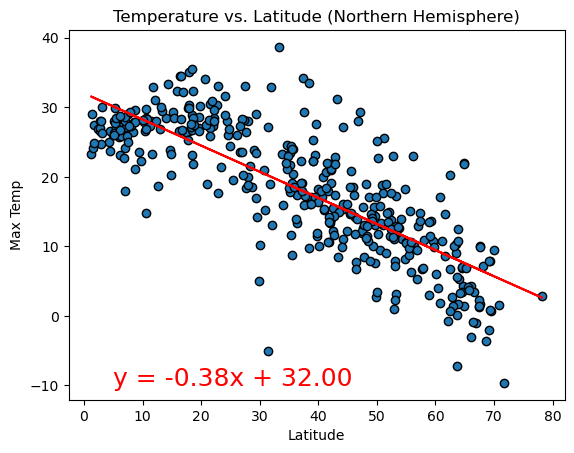

In [156]:
# Linear regression on Northern Hemisphere
temp_lat_north_hemi = lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], edgecolors='black')
plt.plot(northern_hemi_df['Lat'], temp_lat_north_hemi[0]*northern_hemi_df['Lat'] + temp_lat_north_hemi[1], color='red', label='Linear Regression')

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Temperature vs. Latitude (Northern Hemisphere)')

print(f"The r-value is: {temp_lat_north_hemi[2]}")
equation_north_temp = f'y = {temp_lat_north_hemi[0]:.2f}x + {temp_lat_north_hemi[1]:.2f}'
plt.text(5, -10, equation_north_temp, fontsize=18, color='red')

plt.show()

The r-value is: 0.7876515194635231


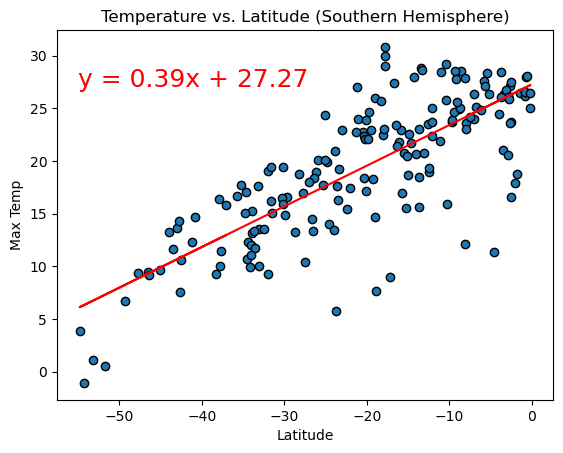

In [157]:
# Linear regression on Southern Hemisphere
temp_lat_south_hemi = lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], edgecolors='black')
plt.plot(southern_hemi_df['Lat'], temp_lat_south_hemi[0]*southern_hemi_df['Lat'] + temp_lat_south_hemi[1], color='red', label='Linear Regression')

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Temperature vs. Latitude (Southern Hemisphere)')

print(f"The r-value is: {temp_lat_south_hemi[2]}")
equation_south_temp = f'y = {temp_lat_south_hemi[0]:.2f}x + {temp_lat_south_hemi[1]:.2f}'
plt.text(-55, 27, equation_south_temp, fontsize=18, color='red')

plt.show()

**Discussion about the linear relationship:** It is said that the warmest weather on the planet is located close to the Equator and this study shows that to be true. Looking at the scatter plots for both the Northern and Southern Hemispheres, it is clear that the closer each hemisphere gets to the Equator (0 Latitude), the warmer the temperatures become. Conversely, it can be said that the further away from the Equator, the colder the temperatures become.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.11829109816517268


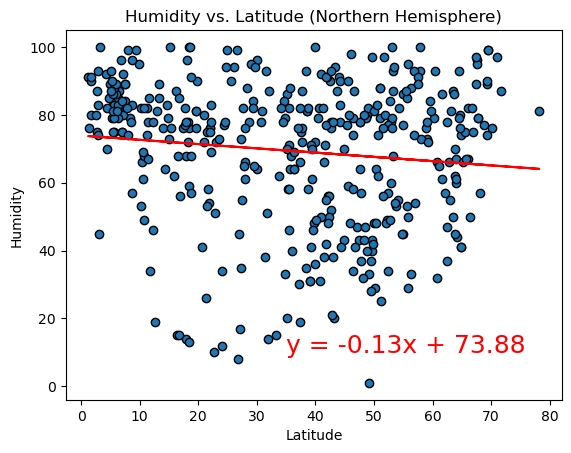

In [158]:
# Northern Hemisphere
humid_lat_north_hemi = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], edgecolors='black')
plt.plot(northern_hemi_df['Lat'], humid_lat_north_hemi[0]*northern_hemi_df['Lat'] + humid_lat_north_hemi[1], color='red', label='Linear Regression')

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude (Northern Hemisphere)')

print(f"The r-value is: {humid_lat_north_hemi[2]}")
equation_north_humid = f'y = {humid_lat_north_hemi[0]:.2f}x + {humid_lat_north_hemi[1]:.2f}'
plt.text(35, 10, equation_north_humid, fontsize=18, color='red')

plt.show()

The r-value is: 0.07888774101756509


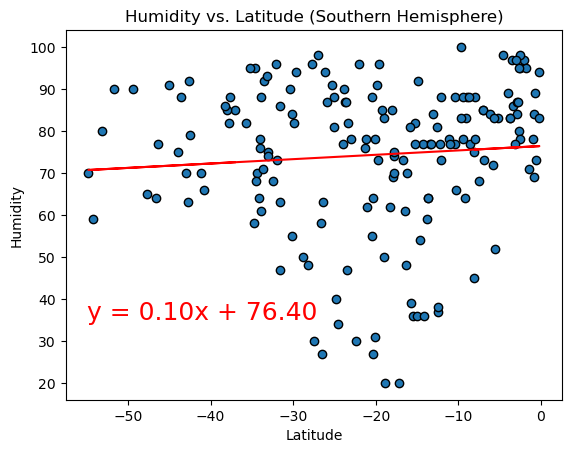

In [159]:
# Southern Hemisphere
humid_lat_south_hemi = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], edgecolors='black')
plt.plot(southern_hemi_df['Lat'], humid_lat_south_hemi[0]*southern_hemi_df['Lat'] + humid_lat_south_hemi[1], color='red', label='Linear Regression')

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude (Southern Hemisphere)')

print(f"The r-value is: {humid_lat_south_hemi[2]}")
equation_south_humid = f'y = {humid_lat_south_hemi[0]:.2f}x + {humid_lat_south_hemi[1]:.2f}'
plt.text(-55, 35, equation_south_humid, fontsize=18, color='red')

plt.show()

**Discussion about the linear relationship:** There does not appear to be a strong correlation with regard to proximity to the Equator and the amount of humidity. The northern hemisphere looks to have more data which is most likely due to the majority of the earth's population living there. Regardless, the amount of humidity does not seem to decrease drastically the further you get from the Equator no matter which direction you travel.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.04956556089441926


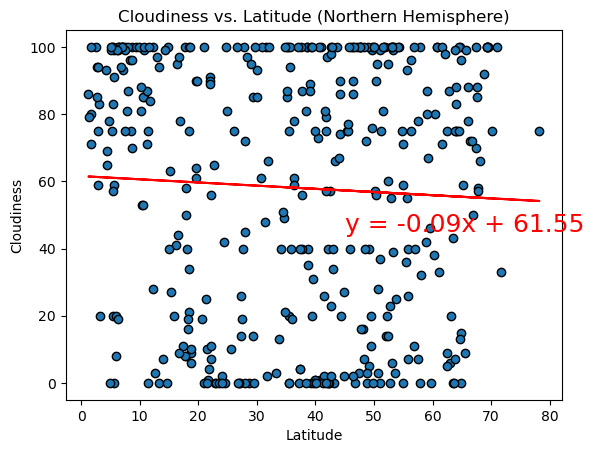

In [162]:
# Northern Hemisphere
cloud_lat_north_hemi = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], edgecolors='black')
plt.plot(northern_hemi_df['Lat'], cloud_lat_north_hemi[0]*northern_hemi_df['Lat'] + cloud_lat_north_hemi[1], color='red', label='Linear Regression')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude (Northern Hemisphere)')

print(f"The r-value is: {cloud_lat_north_hemi[2]}")
equation_north_humid = f'y = {cloud_lat_north_hemi[0]:.2f}x + {cloud_lat_north_hemi[1]:.2f}'
plt.text(45, 45, equation_north_humid, fontsize=18, color='red')

plt.show()

The r-value is: -0.058714805335263


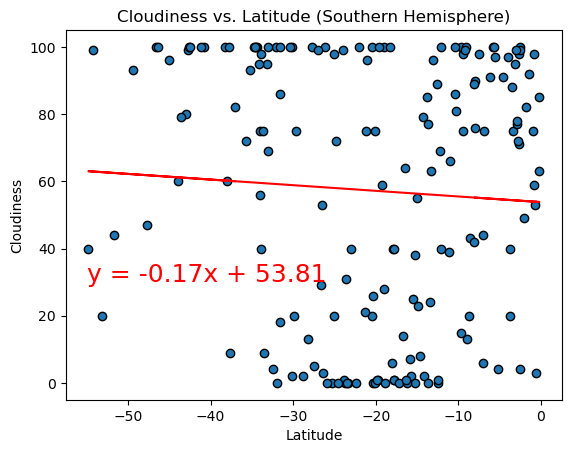

In [166]:
# Southern Hemisphere
cloud_lat_south_hemi = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], edgecolors='black')
plt.plot(southern_hemi_df['Lat'], cloud_lat_south_hemi[0]*southern_hemi_df['Lat'] + cloud_lat_south_hemi[1], color='red', label='Linear Regression')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude (Southern Hemisphere)')

print(f"The r-value is: {cloud_lat_south_hemi[2]}")
equation_south_humid = f'y = {cloud_lat_south_hemi[0]:.2f}x + {cloud_lat_south_hemi[1]:.2f}'
plt.text(-55, 30, equation_south_humid, fontsize=18, color='red')

plt.show()

**Discussion about the linear relationship:** This study shows that proximity to the Equator has no real impact on cloudiness. This makes sense since clouds are constantly moving with the wind current. Regardless of location, some days are clear skies, some are partly cloudy, and others are overcast.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.056935163670607726


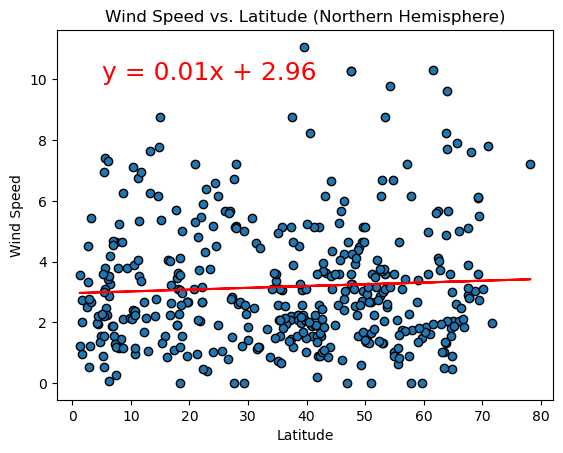

In [171]:
# Northern Hemisphere
wind_lat_north_hemi = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], edgecolors='black')
plt.plot(northern_hemi_df['Lat'], wind_lat_north_hemi[0]*northern_hemi_df['Lat'] + wind_lat_north_hemi[1], color='red', label='Linear Regression')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude (Northern Hemisphere)')

print(f"The r-value is: {wind_lat_north_hemi[2]}")
equation_north_humid = f'y = {wind_lat_north_hemi[0]:.2f}x + {wind_lat_north_hemi[1]:.2f}'
plt.text(5, 10, equation_north_humid, fontsize=18, color='red')

plt.show()

The r-value is: -0.14729350305539024


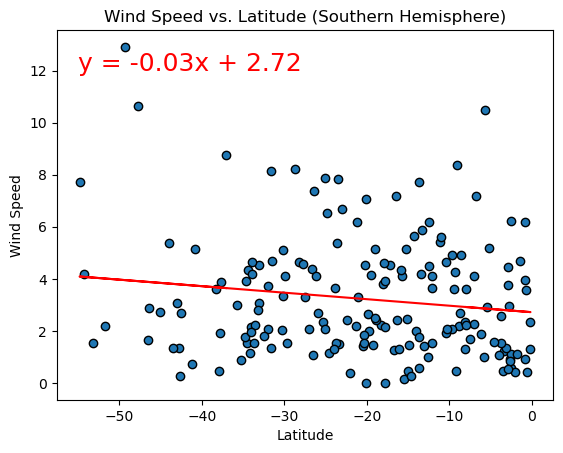

In [172]:
# Southern Hemisphere
wind_lat_south_hemi = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], edgecolors='black')
plt.plot(southern_hemi_df['Lat'], wind_lat_south_hemi[0]*southern_hemi_df['Lat'] + wind_lat_south_hemi[1], color='red', label='Linear Regression')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude (Southern Hemisphere)')

print(f"The r-value is: {wind_lat_south_hemi[2]}")
equation_south_humid = f'y = {wind_lat_south_hemi[0]:.2f}x + {wind_lat_south_hemi[1]:.2f}'
plt.text(-55, 12, equation_south_humid, fontsize=18, color='red')

plt.show()

**Discussion about the linear relationship:** This is yet another study that shows there is no correlation with proximity to the Equator and the wind speed. Winds are usually calm but they can pick up in gusts for brief periods of time. High winds are usually associated with storms and storms occur all over the world.